In [31]:
from comet_ml import Experiment
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

experiment = Experiment(
  api_key="itFKoifJNhhOeaU8zW5h5qkwl",
  project_name="ilya-skillfactory-project-medical-appointment",
  workspace="chertt007"
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/chertt007/ilya-skillfactory-project-medical-appointment/4f02bb35075f4f41a06d887076fef463



## Загружаекм данные

In [32]:
df = pd.read_csv('./data/KaggleV2-May-2016.csv')
df 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


## Визуализация

{'web': 'https://www.comet.com/api/image/download?imageId=eef02de5105745fa98925e4f113d24bc&experimentKey=4f02bb35075f4f41a06d887076fef463',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=eef02de5105745fa98925e4f113d24bc&experimentKey=4f02bb35075f4f41a06d887076fef463',
 'imageId': 'eef02de5105745fa98925e4f113d24bc'}

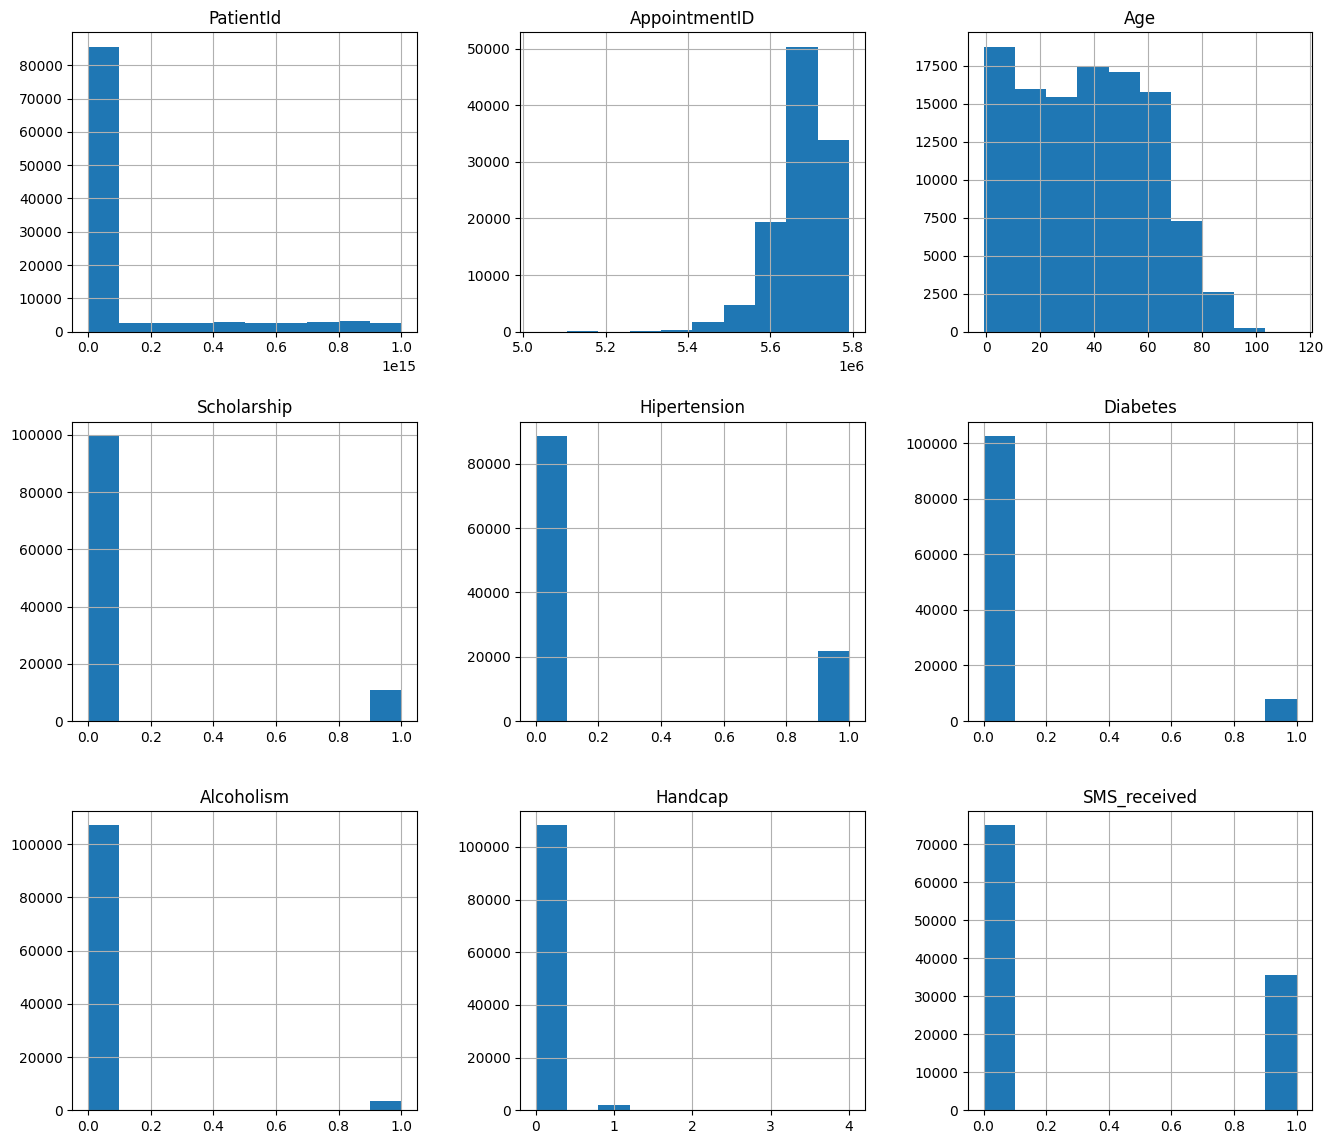

In [33]:
df.hist(figsize=(16,14))
experiment.log_figure(figure=plt)

In [34]:
print('Уникальные значения в age => {}'.format(df.Age.unique()))

Уникальные значения в age => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [35]:
#удалим аномальные значения
df = df[(df.Age >=0) & (df.Age <=110)]
df.Age.value_counts()

Age
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: count, Length: 102, dtype: int64

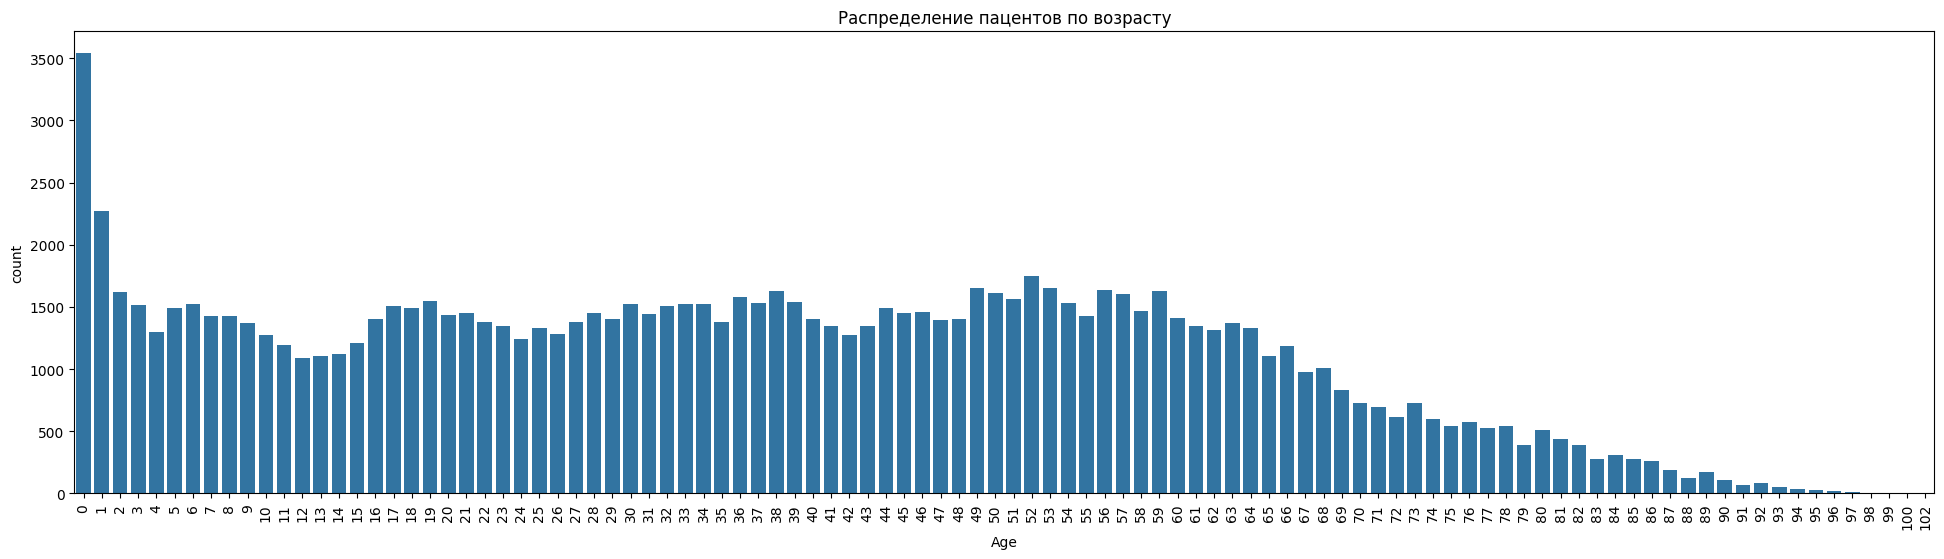

In [36]:
plt.figure(figsize=(24,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("Распределение пацентов по возрасту")
experiment.log_figure(figure=plt)
plt.show()

## Придел ли пациент на назначенный прием?

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


## Кодировка

In [38]:
categorical_column_names = [ 'Gender','Neighbourhood']
encoded_columns = pd.get_dummies(df, columns=categorical_column_names)
encoded_columns.drop(columns=['No-show','AppointmentDay',"ScheduledDay","PatientId","AppointmentID"],axis=1, inplace=True)
encoded_columns.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,Neighbourhood_AEROPORTO,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,62,0,1,0,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,56,0,0,0,0,0,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,62,0,0,0,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8,0,0,0,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,56,0,1,1,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
y=df['No-show']
y=y.replace({'No':0,'Yes':1})
y.value_counts(True)

C:\Users\ilyae\AppData\Local\Temp\ipykernel_18516\531439794.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y=y.replace({'No':0,'Yes':1})


No-show
0    0.798084
1    0.201916
Name: proportion, dtype: float64

Шкалирование

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_columns)
print(X.shape)

(110521, 90)


## Модель

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# initialization
logreg = LogisticRegression()
random_state = 42
# model learning
logreg.fit(X,y)

LogisticRegression()

In [42]:
# logging
params = {"random_state":random_state, "model_type":"logreg"}
experiment.log_parameters(params)

In [43]:
# prediction
y_pred = logreg.predict(X)

In [44]:
# analize
accurancy = accuracy_score(y,y_pred)
print(accurancy)

0.7980836221170637


In [45]:
# metric logging
metrics = {'accurancy':accurancy}
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(y.tolist(), y_pred.tolist())
experiment.display()

## Выделение признаков для дальнейшего анализа

In [46]:
numeric_data = df.drop(columns=['PatientId', 'AppointmentID','ScheduledDay', 'AppointmentDay','Neighbourhood'], axis=1)


In [47]:
# Преобразуем Gender в числовой формат (например, F = 0, M = 1)
numeric_data['Gender'] = numeric_data['Gender'].map({'F': 0, 'M': 1})

# Преобразуем No-show в числовой формат (например, No = 0, Yes = 1)
numeric_data['No-show'] = numeric_data['No-show'].map({'No': 0, 'Yes': 1})
# Проверим результат
numeric_data

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,62,0,1,0,0,0,0,0
1,1,56,0,0,0,0,0,0,0
2,0,62,0,0,0,0,0,0,0
3,0,8,0,0,0,0,0,0,0
4,0,56,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
110522,0,56,0,0,0,0,0,1,0
110523,0,51,0,0,0,0,0,1,0
110524,0,21,0,0,0,0,0,1,0
110525,0,38,0,0,0,0,0,1,0


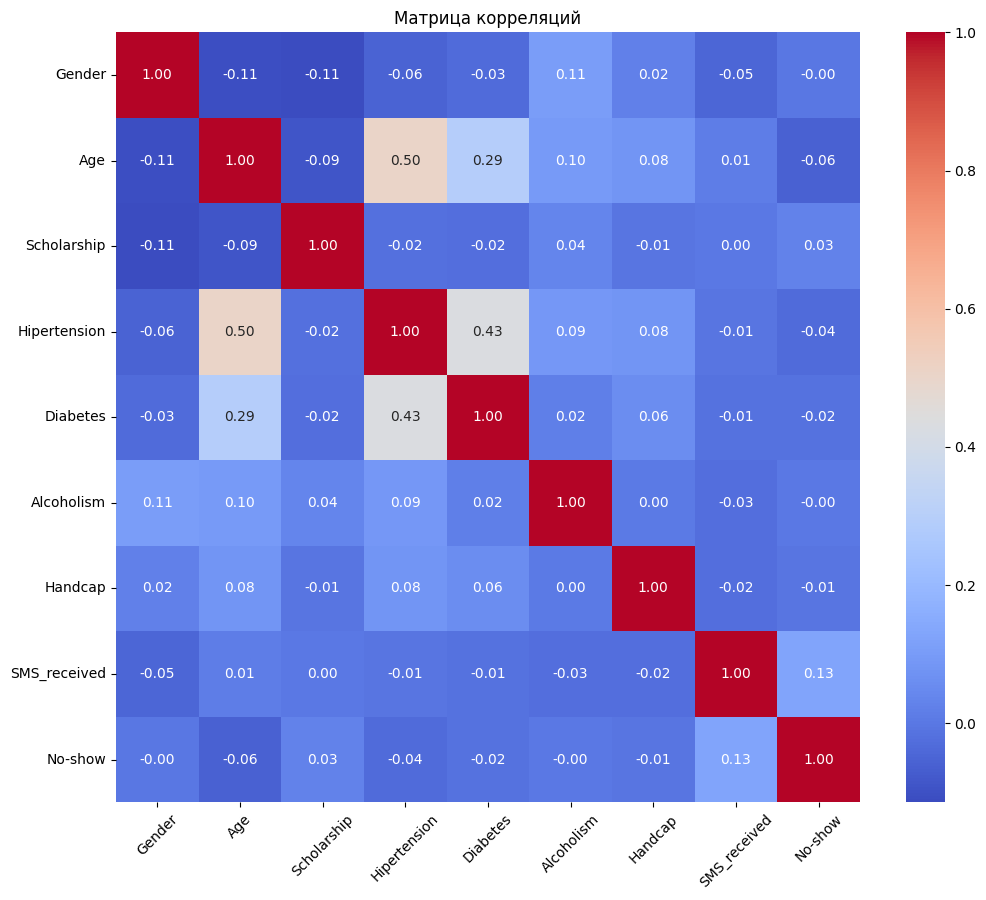

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : embarrassed_possum_9584
COMET INFO:     url                   : https://www.comet.com/chertt007/ilya-skillfactory-project-medical-appointment/4f02bb35075f4f41a06d887076fef463
COMET INFO:   Metrics:
COMET INFO:     accurancy : 0.7980836221170637
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : None
COMET INFO:     clip              : False
COMET INFO:     copy              : True
COMET INFO:     dual              : False
COMET INFO:     feature_range     : (0, 1)
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : None
COMET INFO:     ma

In [48]:


plt.figure(figsize=(12, 10)) 
sns.heatmap(numeric_data.corr(numeric_only=True), 
            annot=True,              
            fmt=".2f",              
            cmap='coolwarm',          
            cbar=True,             
            annot_kws={"size": 10})  
plt.xticks(rotation=45)               
plt.yticks(rotation=0)               
plt.title('Матрица корреляций')      
experiment.log_figure(figure_name="Матрица корреляций", figure=plt)
plt.show()
experiment.end()

